# Abstract

## Components of the System

1. **Plants**: They grow by taking carbon dioxide \(CO2\) from the atmosphere and using sunlight to turn it into energy through a process called photosynthesis. This is how they build their leaves, branches, and stems.

2. **Litter**: As plants grow, some parts like leaves, branches, and stems eventually die and fall off. This dead plant material is known as litter. It accumulates on the ground and is the beginning of a natural recycling process.

3. **Humus**: The litter doesn't just pile up indefinitely. Over time, it breaks down thanks to small organisms like bacteria and fungi, a process known as decomposition. They convert the litter into a rich, dark substance called humus. Humus is very important for the soil because it holds moisture and nutrients that help new plants grow.

4. **Atmosphere**: While the litter is breaking down into humus, the process releases CO2 back into the atmosphere. This release happens because the organisms that break down the litter respire, just like we do, taking in oxygen and giving off CO2. So the carbon in the plant's leaves, branches, and stems returns to the atmosphere, ready to be used again by other growing plants



## Base Model

We set up a discrete time model that stimulates carbon cycling among litter, humus, and atmosphere, in which

- carbon enters the litter through litterfall and leaves from the litter to humus via humification
- carbon enters atmosphere from humus and litter via respiration, and carbon in the atmosphere gets converted back into litter via plant growth, which produce litter at some rate proportional to the number of trees

### State Variables

$LC_t:$ carbon density ($gC/m^2$) in the litter at time $t$

$HC_t:$ carbon density in humus at time $t$

$AC_t:$ carbon density in atmosphere at time $t$

$PC_t:$ carbon density in plants at time $t$

### Parameters

$r_{litter \_ to \_ humus}:$ rate of carbon leaves from litter to humus via humification, proportional to the amount of litter

$r_{litter \_ to \_ atmos}:$ rate of carbon leaves from the litter to atmosphere

### Constants

$z:$ rate of carbon enters the litter through litterfall

$A:$ area of the forest in the system

### Model Scenario 1

$$LC_{t+1} = LC_{t} + z/A  - r_{litter \_ to \_ humus} \cdot LC_{t}$$

### Model Scenario 2

$$A_{t+1} = A_t + 1.5$$

$$z_{t+1} = 0.77 \cdot A_{t+1}$$

$$LC_{t+1} = LC_{t} + z_t/A_t - r_{litter \_ to \_ humus} \cdot LC_t - r_{litter \_ to \_ atmos} \cdot LC_t$$

$$HC_{t+1} = HC_{t} + r_{litter \_ to \_ humus} \cdot LC_t - r_{humus \_ to \_ atmos} \cdot HC_t$$

$$AC_{t+1} = AC_t + r_{litter \_ to \_ atmos} \cdot LC_t + r_{humus \_ to \_ atmos} \cdot HC_t - z_t/A_t$$



In [95]:
periods <- 99999
r_lh <- 0.4/4400
z <- 27.8
A <- 4400
LC <- rep(NA, periods)
LC[1] <- 22.23/A[1]

t_vals <- seq(from = 0, to = periods, by = 1)

for (i in 1:periods) {
    LC[i+1] <- LC[i] + z/A - r_lh*LC[i]
}

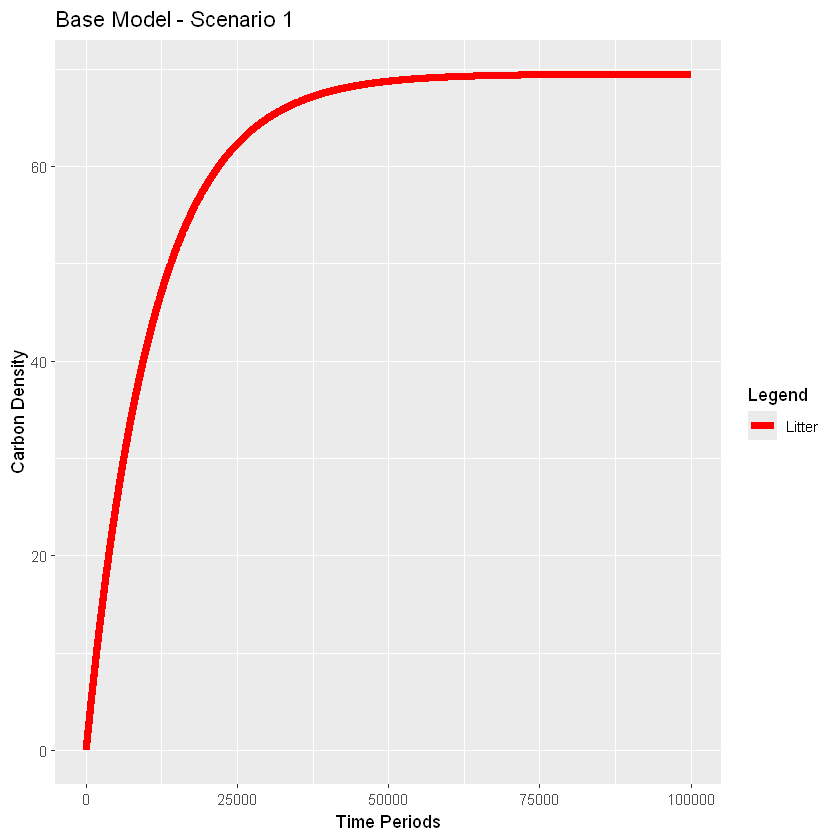

In [96]:
library(ggplot2)

data <- data.frame(times = t_vals[1:length(t_vals)], litter = LC[1:length(t_vals)])

colours <- c("Litter" = "red")
ggplot(data) + 
    geom_line(mapping = aes(x = times, y = litter, colour = "Litter"), lwd = 2) +
    labs(x = "Time Periods", y = "Carbon Density", title = "Base Model - Scenario 1", colour = "Legend") +
    scale_colour_manual(values = colours)

In [97]:
periods <- 500000
r_lh <- 0.4/3610
r_la <- 0.6/3610
r_ha <- 0.1*0.95/3610
A_growth <- 1.5
sigma <- 0.77

t_vals <- seq(from = 0, to = periods, by = 1)

LC <- rep(NA, periods)
HC <- rep(NA, periods)
AC <- rep(NA, periods)
A <- rep(NA, periods)
z <- rep(NA, periods)
A[1] <- 3610
z[1] <- 27.8
LC[1] <- 22.23/A[1]
HC[1] <- 111.19/A[1]
AC[1] <- 32000

for (i in 1:periods) {
    A[i+1] <- A[i] + A_growth
    z[i+1] <- sigma*A[i+1]
    LC[i+1] <- LC[i] + z[i]/A[i] - r_lh*LC[i] - r_la*LC[i]
    HC[i+1] <- HC[i] + r_lh*LC[i] - r_ha*HC[i]
    AC[i+1] <- AC[i] + r_la*LC[i] + r_ha*HC[i] - z[i]/A[i]
    
    # ac <- AC[i] + r_la*LC[i] + r_ha*HC[i] - z[i]/A[i]
    # if (ac < 0) {
    #     AC[i+1] <- 0
    #     t <- i+1
    #     break
    # } else {
    #     AC[i+1] <- ac
    # }
    # t <- periods
}

print(LC[499950:500000])
print(HC[499950:500000])
print(AC[499950:500000])

 [1] 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7
[11] 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7
[21] 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7
[31] 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7
[41] 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7 2779.7
[51] 2779.7
 [1] 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98
 [9] 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98
[17] 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98
[25] 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98
[33] 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98
[41] 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98 11703.98
[49] 11703.98 11703.98 11703.98
 [1] 17516.36 17516.36 17516.36 17516.36 17516.36 17516.36 17516.36 17516.36
 [9] 17516.36 17516.36 17516.36 17516.36 1

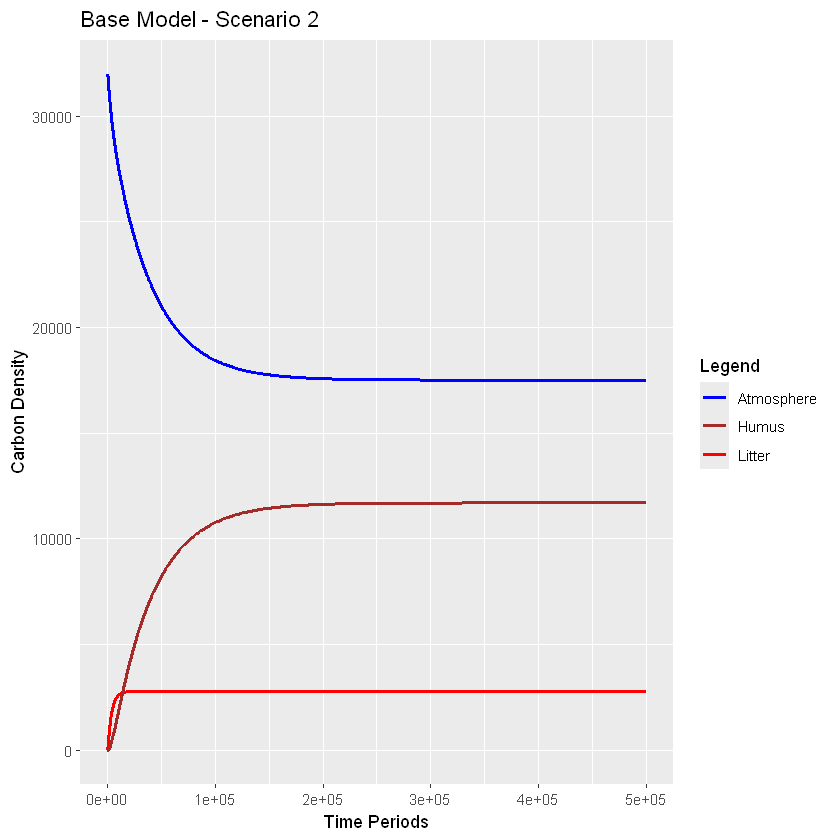

In [98]:
library(ggplot2)

# periods <- min(t, periods)
data <- data.frame(times = t_vals[1:periods], litter = LC[1:periods], humus = HC[1:periods], atmos = AC[1:periods])

colours <- c("Litter" = "red", "Humus" = "brown", "Atmosphere" = "blue")
ggplot(data) + 
    geom_line(mapping = aes(x = times, y = litter, colour = "Litter"), lwd = 1) +
    geom_line(mapping = aes(x = times, y = humus, colour = "Humus"), lwd = 1) +
    geom_line(mapping = aes(x = times, y = atmos, colour = "Atmosphere"), lwd = 1) +
    labs(x = "Time Periods", y = "Carbon Density", title = "Base Model - Scenario 2", colour = "Legend") +
    scale_colour_manual(values = colours)

## Expanded ecosystem

### Parameters and Constants

1. $z:$ constant rate of carbon entering the system
2. $X_i:$ amount of carbon in the $i$-th component where

	a. the 1-st component is "leaves" \
    b. the 2nd component is "branches" \
    c. the 3rd component is "stems" \
    d. the 4th component is "roots" \
    f. the 5th component is "litter" \
    g. the 6th component is "humus" \
    h. the 7th component is "stable humus charcoal"
3. $k_{ij}:$ rate of carbon flow from $X_i$ to $X_j$, proportional to $X_i$

### Model

$$X_{1_{t+1}} = X_{1_{t}} + p_1z - k_{15}X_{1_{t}}$$

$$X_{2_{t+1}} = X_{2_{t}} + p_2z - k_{25}X_{2_{t}}$$

$$X_{3_{t+1}} = X_{3_{t}} + p_3z - k_{35}X_{3_{t}}$$

$$X_{4_{t+1}} = X_{4_{t}} + p_4z - k_{46}X_{4_{t}}$$

$$X_{5_{t+1}} = X_{5_{t}} + k_{15}X_{1_{t}} + k_{25}X_{2_{t}} + k_{35}X_{3_{t}} - k_{50}X_{5_{t}} - k_{56}X_{5_{t}}$$

$$X_{6_{t+1}} = X_{6_{t}} + k_{46}X_{4_{t}} - k_{60}X_{6_{t}} - k_{67}X_{6_{t}}$$

$$X_{7_{t+1}} = X_{7_{t}} + k_{67}X_{6_{t}} - k_{70}X_{7_{t}}$$



In [99]:
# define model
model <- function(periods, init, params) {
    
    t_vals <- seq(from = 0, to = periods-1, by = 1)

    X <- matrix(rep(NA, 7*periods), nrow = 7, ncol = periods, byrow = TRUE)
    
    # set initial condition
    X[, 1] <- init

    # Simulation loop
    for (i in 1:(periods-1)) {
      X[1, i+1] <- X[1, i] + p_1*z - k_15*X[1, i]
      X[2, i+1] <- X[2, i] + p_2*z - k_25*X[2, i]
      X[3, i+1] <- X[3, i] + p_3*z - k_35*X[3, i]
      X[4, i+1] <- X[4, i] + p_4*z - k_46*X[4, i]
      X[5, i+1] <- X[5, i] + k_15*X[1, i] + k_25*X[2, i] + k_35*X[3, i] - k_50*X[5, i] - k_56*X[5, i]
      X[6, i+1] <- X[6, i] + k_46*X[4, i] + k_56*X[5, i] - k_60*X[6, i] - k_67*X[6, i]
      X[7, i+1] <- X[7, i] + k_67*X[6, i] - k_70*X[7, i]
    }
    
    return(X)
}

natural_land_transfer <- function(land_type) {
    if (land_type == "tropical") {
        return(1.5)
    } else if (land_type == "temporal") {
        return(0.5)
    }
    return(0)
}

land_transfer <- function(land_type) {
    if (land_type == "tropical") {
        return(1.5-15)
    } else if (land_type == "temporal") {
            return(-1.5-2)
    } else if (land_type == "algricultural") {
        return(399)
    }
    print("No land type specified")
    return(0)
}

model_land_transfer <- function(periods, init, params, cutting_and_burning, add_season=FALSE) {
    
    t_vals <- seq(from = 0, to = periods-1, by = 1)

    X <- matrix(rep(NA, 7*periods), nrow = 7, ncol = periods, byrow = TRUE)
    
    # set initial condition
    X[, 1] <- init
    current_area <- area

    # Simulation loop
    for (i in 1:(periods-1)) {
        z <- sigma*area
        X[1, i+1] <- X[1, i] + p_1*z - k_15*X[1, i]
        X[2, i+1] <- X[2, i] + p_2*z - k_25*X[2, i]
        X[3, i+1] <- X[3, i] + p_3*z - k_35*X[3, i]
        X[4, i+1] <- X[4, i] + p_4*z - k_46*X[4, i]
        X[5, i+1] <- X[5, i] + k_15*X[1, i] + k_25*X[2, i] + k_35*X[3, i] - k_50*X[5, i] - k_56*X[5, i]
        X[6, i+1] <- X[6, i] + k_46*X[4, i] + k_56*X[5, i] - k_60*X[6, i] - k_67*X[6, i]
        X[7, i+1] <- X[7, i] + k_67*X[6, i] - k_70*X[7, i]
        if (cutting_and_burning) {
            if (!add_season && land_type == "temporal") {
                area <- area - 2
            } else if (add_season && land_type == "temporal" && i %% 4 == 0) {
                area <- area - 6.5
            } else if (add_season && land_type == "temporal" && i %% 4 != 0) {
                area <- area - 4.5
            } else if (add_season && land_type == "algricultural" && i %% 4 == 0) {
                current_area <- area
                area <- 0 # all crops are harvested
            } else if (add_season && land_type == "algricultural" && i %% 4 != 0) {
                area <- current_area + 399
                current_area <- area
            } else if (land_type == "tropical") {
                area <- area - 13.5
            }
        } else {
            area <- area + natural_land_transfer(land_type)
        }
    }
    return(X)
}

# plot the trend line of changes in carbon density in the model
library(ggplot2)
draw_model <- function(X, title) {
    periods <- length(X[1,])
    t_vals <- seq(from = 0, to = periods-1, by = 1)
    
    data <- data.frame(times = t_vals, leaves = X[1,], branches = X[2,], stems = X[3,], roots = X[4,], litter = X[5,], humus = X[6,], charcoal = X[7,])
    
    colours <- c("Leaves" = "green", "Branches" = "yellow", "Stems" = "orange", "Roots" = "red", "Litter" = "brown", "Humus" = "blue", "Charcoal" = "black")
    ggplot(data) + 
      geom_line(mapping = aes(x = times, y = leaves, colour = "Leaves"), lwd = 1) +
      geom_line(mapping = aes(x = times, y = branches, colour = "Branches"), lwd = 1) +
      geom_line(mapping = aes(x = times, y = stems, colour = "Stems"), lwd = 1) +
      geom_line(mapping = aes(x = times, y = roots, colour = "Roots"), lwd = 1) +
      geom_line(mapping = aes(x = times, y = litter, colour = "Litter"), lwd = 1) +
      geom_line(mapping = aes(x = times, y = humus, colour = "Humus"), lwd = 1) +
      geom_line(mapping = aes(x = times, y = charcoal, colour = "Charcoal"), lwd = 1) +
      labs(x = "Time", y = "Carbon Density", title = title, colour = "Legend") +
      scale_colour_manual(values = colours)
}

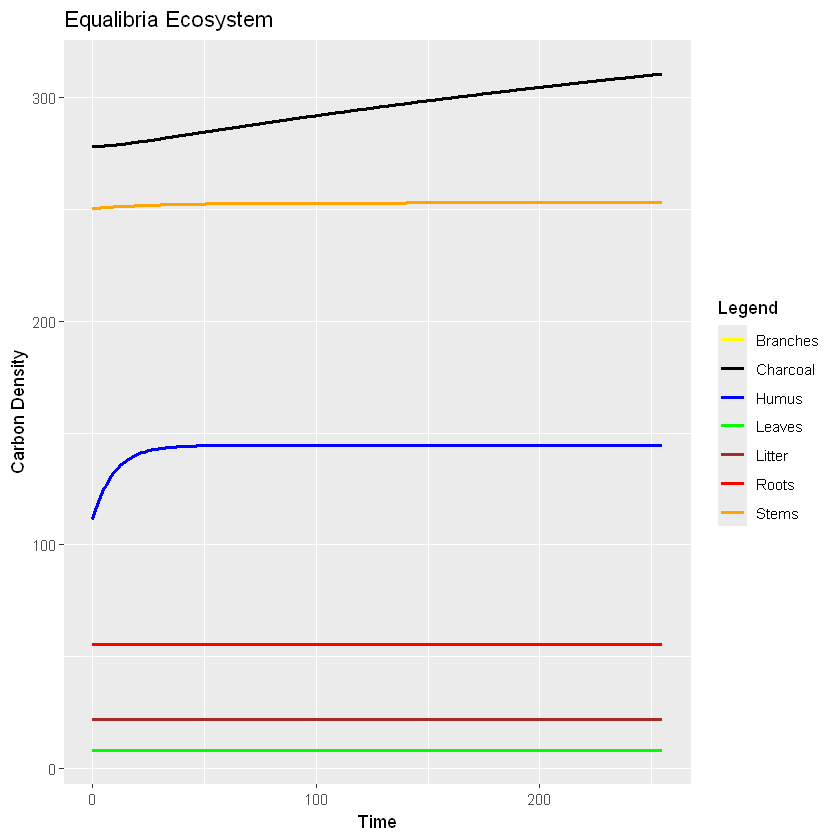

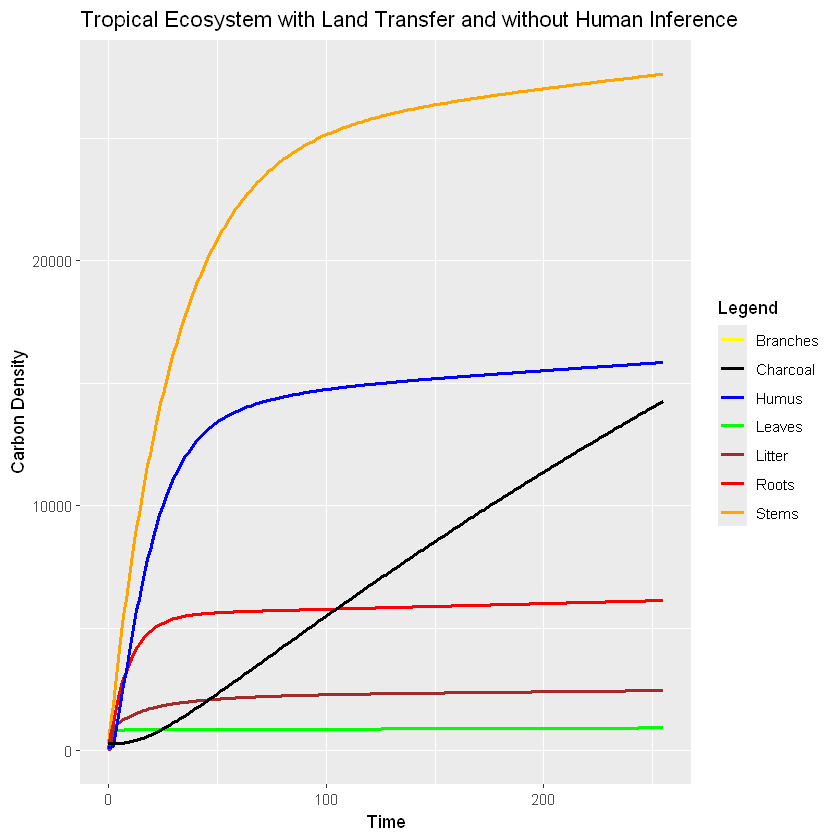

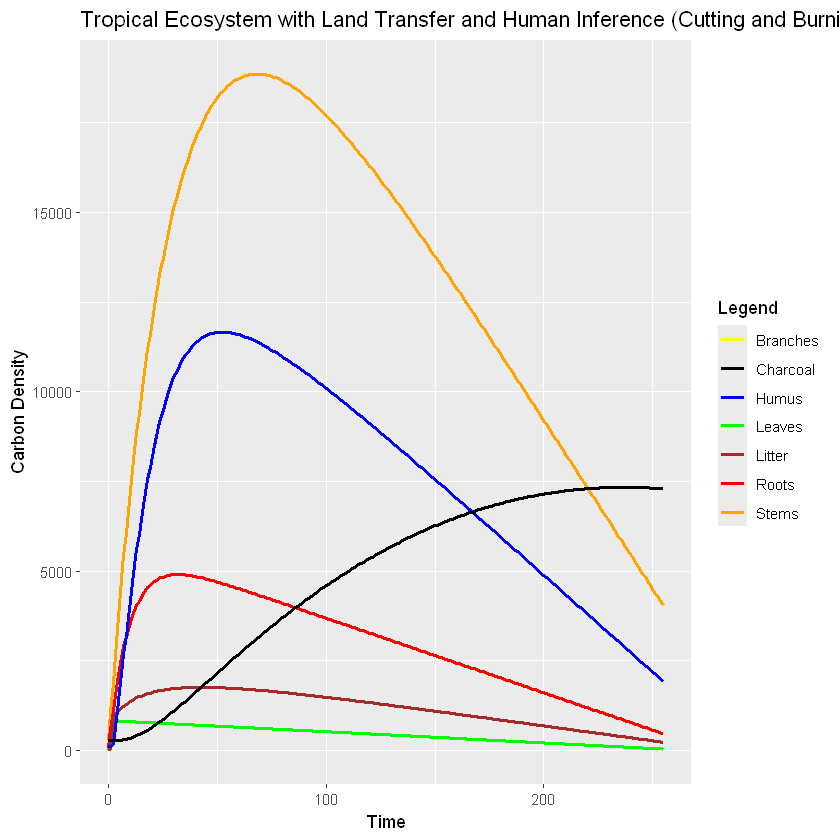

In [105]:
z <- 27.8
p_1 <- 0.3
p_2 <- 0.2
p_3 <- 0.3
p_4 <- 0.2
k_15 <- 1.0
k_25 <- 0.1
k_35 <- 0.033
k_46 <- 0.1
k_50 <- 0.6
k_56 <- 0.4
k_60 <- 0.1*0.95
k_67 <- 0.1*0.05
k_70 <- 0.002
sigma <- 0.77
area <- 3610
land_type <- "tropical"

periods <- 256
params_tropical <- c(land_type, area, sigma, z, p_1, p_2, p_3, p_4, k_15, k_25, k_35, k_46, k_50, k_56, k_60, k_67, k_70)
init_tropical <- c(8.34, 55.6, 250.2, 55.6, 22.23, 111.19, 277.97)

X <- model(periods, init_tropical, params_tropical)
draw_model(X, title="Equalibria Ecosystem")

Y <- model_land_transfer(periods, init_tropical, params_tropical, cutting_and_burning=FALSE)
draw_model(Y, title="Tropical Ecosystem with Land Transfer and without Human Inference")

Z <- model_land_transfer(periods, init_tropical, params_tropical, cutting_and_burning=TRUE)
draw_model(Z, title="Tropical Ecosystem with Land Transfer and Human Inference (Cutting and Burning)")

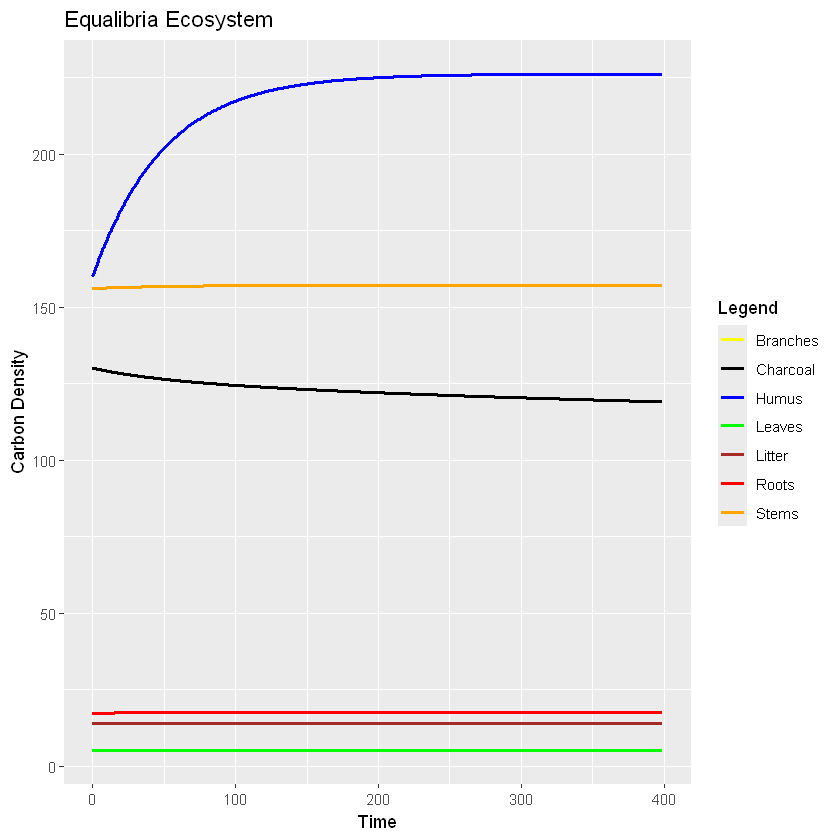

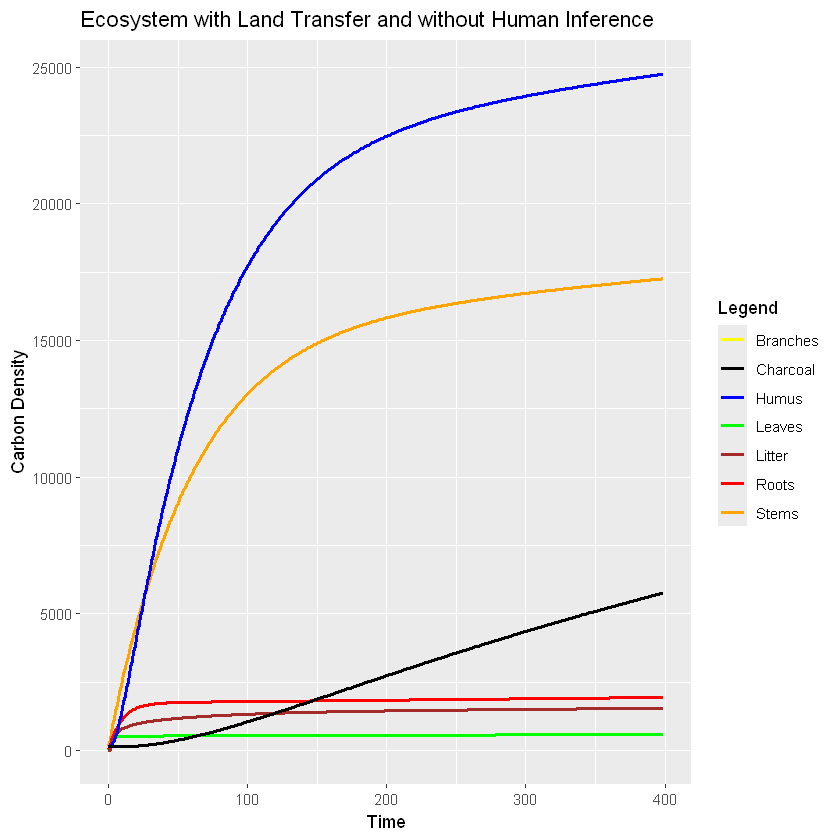

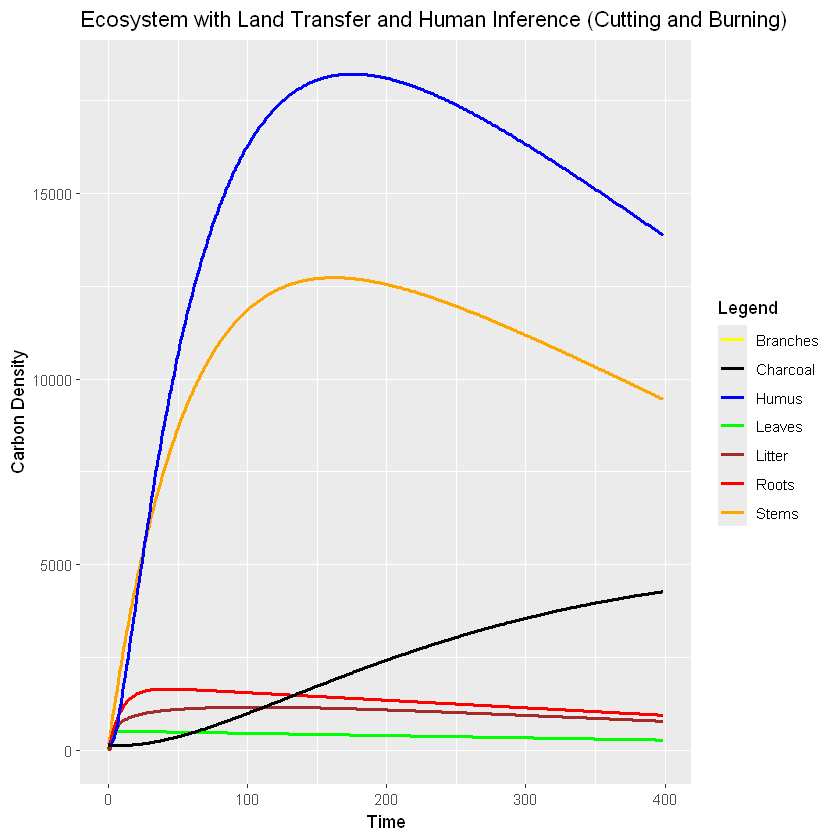

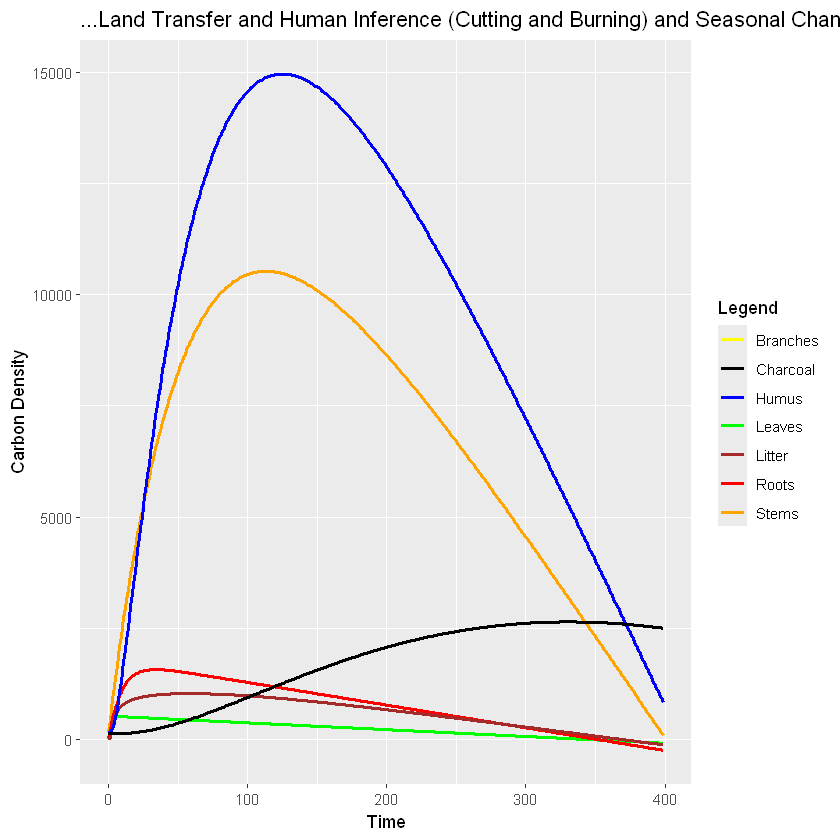

In [106]:
z <- 8.7
p_1 <- 0.3
p_2 <- 0.2
p_3 <- 0.3
p_4 <- 0.2
k_15 <- 0.5
k_25 <- 0.1
k_35 <- 0.0166
k_46 <- 0.1
k_50 <- 0.5*0.6
k_56 <- 0.5*0.4
k_60 <- 0.02*0.95
k_67 <- 0.02*0.05
k_70 <- 0.002
sigma <- 0.51
area <- 1705
land_type <- "temporal"

periods <- 400
params_temporal <- c(land_type, sigma, area, z, p_1, p_2, p_3, p_4, k_15, k_25, k_35, k_46, k_50, k_56, k_60, k_67, k_70)
init_temporal <- c(5.2, 17.3, 156.1, 17.3, 13.87, 160.1, 130.05)

X <- model(periods, init_temporal, params_temporal)
draw_model(X, title="Equalibria Ecosystem")

Y <- model_land_transfer(periods, init_temporal, params_temporal, cutting_and_burning=FALSE)
draw_model(Y, title="Ecosystem with Land Transfer and without Human Inference")

Z <- model_land_transfer(periods, init_temporal, params_temporal, cutting_and_burning=TRUE)
draw_model(Z, title="Ecosystem with Land Transfer and Human Inference (Cutting and Burning)")

A <- model_land_transfer(periods, init_temporal, params_temporal, cutting_and_burning=TRUE, add_season=TRUE)
draw_model(A, title="...Land Transfer and Human Inference (Cutting and Burning) and Seasonal Changes")

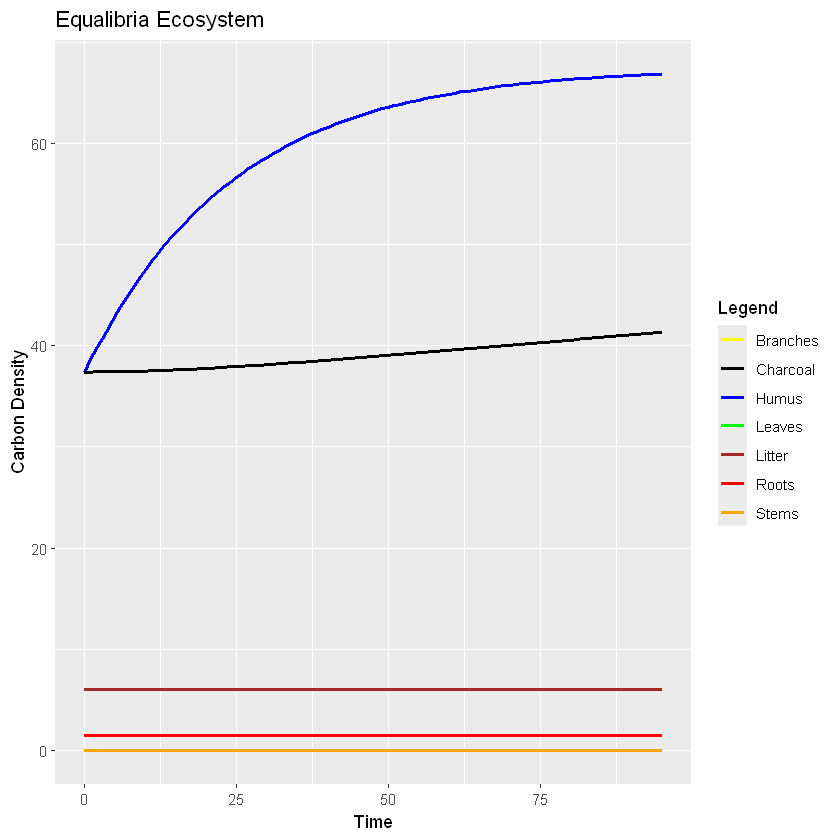

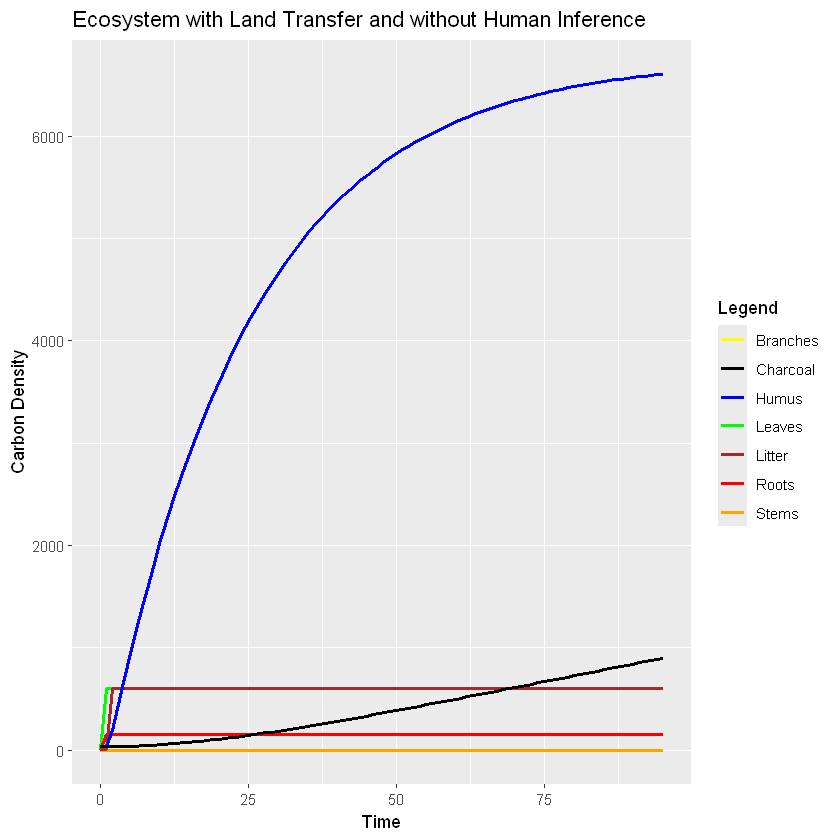

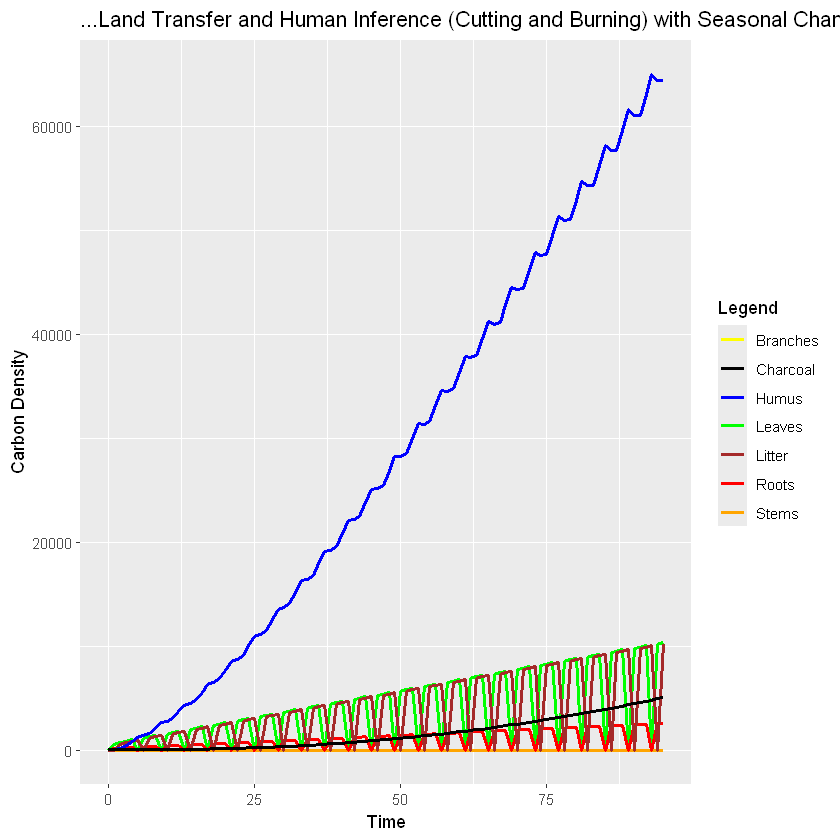

In [108]:
z <- 7.5
p_1 <- 0.8
p_2 <- 0
p_3 <- 0
p_4 <- 0.2
k_15 <- 1.0
k_25 <- 0.1
k_35 <- 0.02
k_46 <- 1.
k_50 <- 1.0*0.8
k_56 <- 1.0*0.2
k_60 <- 0.04*0.95
k_67 <- 0.04*0.05
k_70 <- 0.002
sigma <- 0.43
area <- 1745
land_type <- "algricultural"

periods <- 96
params_algricultural <- c(land_type, sigma, area, z, p_1, p_2, p_3, p_4, k_15, k_25, k_35, k_46, k_50, k_56, k_60, k_67, k_70)
init_algricultural <- c(5.98, 0., 0., 1.5, 5.99, 37.41, 37.41)

X <- model(periods, init_algricultural, params_algricultural)
draw_model(X, title="Equalibria Ecosystem")

Y <- model_land_transfer(periods, init_algricultural, params_algricultural, cutting_and_burning=FALSE)
draw_model(Y, title="Ecosystem with Land Transfer and without Human Inference")

Z <- model_land_transfer(periods, init_algricultural, params_algricultural, cutting_and_burning=TRUE, add_season=TRUE)
draw_model(A, title="...Land Transfer and Human Inference (Cutting and Burning) with Seasonal Changes")